**Employee Attrition Analysis**

*   Project Type: Exploratory Data Analysis
*   Contribution: Individual
*   Name: Vedika Awaghade





**Project Summary**

Employee attrition is a major challenge faced by organizations as it leads to loss of skilled workforce and increased hiring costs.
This project performs Exploratory Data Analysis (EDA) on an employee dataset to identify important factors that influence employee attrition.

Various demographic, job-related, and compensation-related attributes are analyzed using statistical methods and data visualizations.
The insights obtained from this analysis can help organizations take preventive measures to improve employee retention.

**Objectives** **of the Project**

- To understand the structure and characteristics of the employee dataset
- To analyze factors affecting employee attrition
- To visualize patterns and trends related to attrition
- To extract meaningful insights using exploratory data analysis

 **Dataset Information**

The dataset used in this project is the IBM HR Employee Attrition dataset obtained from Kaggle.
It contains employee-related information such as age, department, job role, income, job satisfaction, and attrition status.

**Target Variable:** Attrition (Yes / No)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The required Python libraries for data manipulation and visualization are imported.


In [42]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The dataset is successfully loaded and the first few records are displayed to understand the data.


**Dataset Overview**

The dataset contains employee-level information related to demographics, job role, compensation, work conditions, and satisfaction levels.
The objective of analyzing this dataset is to identify patterns and factors contributing to employee attrition.

Irrelevant Features

The following features have constant values and do not contribute to attrition analysis:

EmployeeCount
Over18
StandardHours
These features can be safely dropped from the dataset.

In [43]:
df.drop(['EmployeeCount','EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [44]:
df.shape


(1470, 31)

The dataset contains 1470 employee records and 32 attributes, indicating a moderately sized dataset suitable for exploratory data analysis.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

**Target Variable**

- Attrition: Indicates whether an employee has left the organization.
  - Yes → Employee left
  - No → Employee stayed


The dataset contains a mix of numerical and categorical variables.
No missing values are observed in the dataset.
Categorical variables are stored as object data type, while numerical variables are stored as integer or float types.

In [46]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The statistical summary provides insights into the central tendency, spread, and range of numerical variables, which helps in understanding employee characteristics and identifying potential outliers.

In [47]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [48]:
df.duplicated().sum()

np.int64(0)

**Data Quality Observations**

- The dataset does not contain missing values.
- No duplicate records were found.
- The dataset is clean and suitable for exploratory data analysis.

IBM adatset has columns that add no values


In [49]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

**WHY?**

Section: **Feature Engineering**

In this section, I am creating new features to better capture employee behavior patterns that aren't explicitly in the raw data.

* Tenure Ratio: Helps identify if an employee has spent a significant portion of their career at this company, which can indicate loyalty or stagnation.

* Satisfaction Index: An aggregate score of environment, job, and relationship satisfaction to identify overall workplace sentiment.

* Attrition_Numeric: Converting the target variable to a binary format (0/1) to allow for statistical correlation analysis.

In [50]:
#HOW


# 1. Calculate Tenure Ratio
df['TenureRatio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)

# 2. Combine Satisfaction Metrics
df['TotalSatisfaction'] = (df['EnvironmentSatisfaction'] +
                           df['JobSatisfaction'] +
                           df['RelationshipSatisfaction']) / 3

# 3. Encode Target Variable for Correlation Analysis
df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Display results
df[['Attrition', 'Attrition_Numeric', 'TenureRatio', 'TotalSatisfaction']].head()

,Attrition,Attrition_Numeric,TenureRatio,TotalSatisfaction
0,Yes,1,0.666667,2.333333
1,No,0,0.909091,3.000000
2,Yes,1,0.000000,3.000000
3,No,0,0.888889,3.333333
4,No,0,0.285714,2.333333


In [51]:
# Create new columns for better analysis
df['Tenure_Ratio'] = df['YearsAtCompany'] / (df['TotalWorkingYears'] + 1)
df['Total_Satisfaction'] = (df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']) / 3

**Univariate Analysis**

This section analyzes individual features independently to understand the distribution
of employee demographics and job related attributes. Univariate analysis helps identify
patterns, imbalances, and dominant categories within the dataset before exploring
relationships between variables.


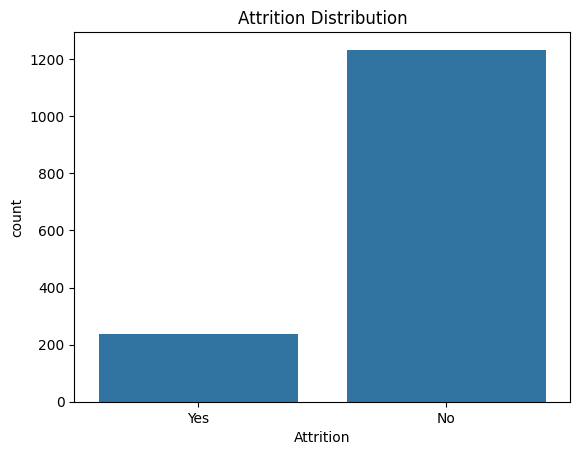

In [52]:
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

The majority of employees stayed with the organization, while a smaller proportion left.
This indicates that attrition is an imbalanced target variable.



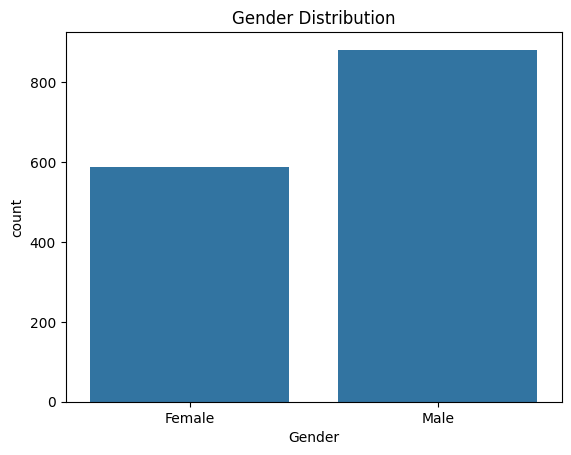

In [53]:
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


The workforce has a higher proportion of male employees compared to female employees.


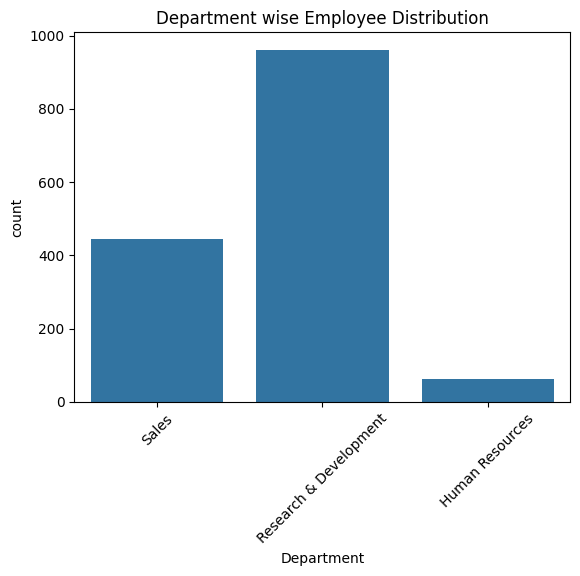

In [54]:
sns.countplot(x='Department', data=df)
plt.xticks(rotation=45)
plt.title('Department wise Employee Distribution')
plt.show()


Most employees belong to the Research & Development department, followed by Sales and Human Resources.


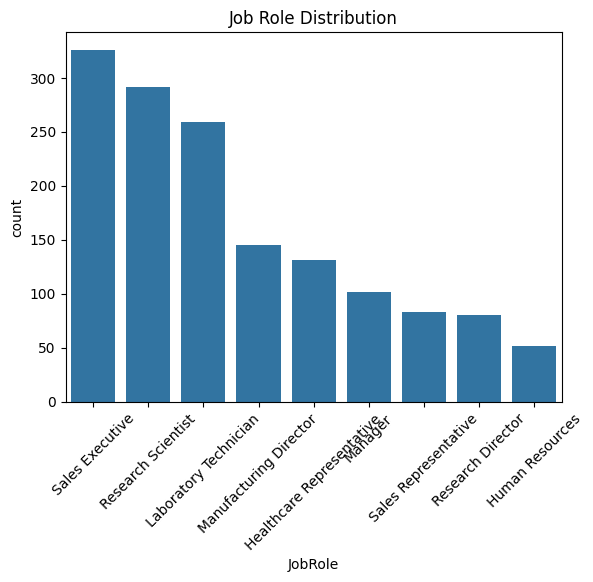

In [55]:
sns.countplot(x='JobRole', data=df)
plt.xticks(rotation=45)
plt.title('Job Role Distribution')
plt.show()

Employees are distributed across multiple job roles, with certain technical and sales roles having higher representation.


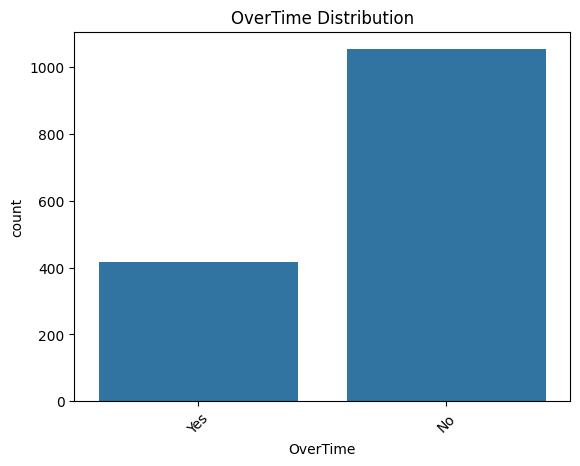

In [56]:
sns.countplot(x='OverTime', data=df)
plt.xticks(rotation=45)
plt.title('OverTime Distribution')
plt.show()


A majority of employees do not work overtime, while a smaller portion reports working overtime.


**Bivariate Analysis**

This section examines the relationship between employee attrition and other categorical
and numerical features. The objective is to identify patterns and associations that may
be linked to higher or lower attrition rates.

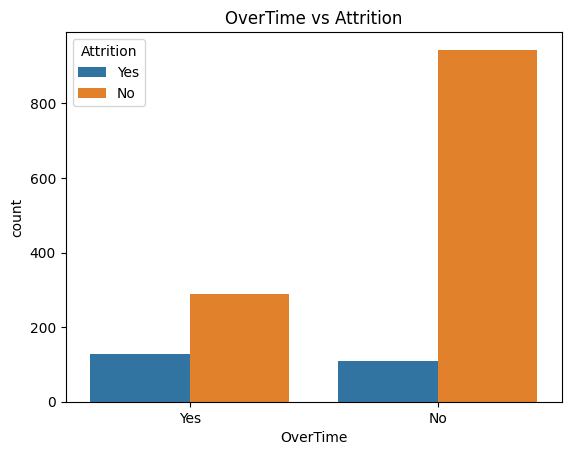

In [57]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('OverTime vs Attrition')
plt.show()

Employees who work overtime show a higher proportion of attrition compared to those who do not.
This suggests that extended working hours may be associated with increased employee exits.


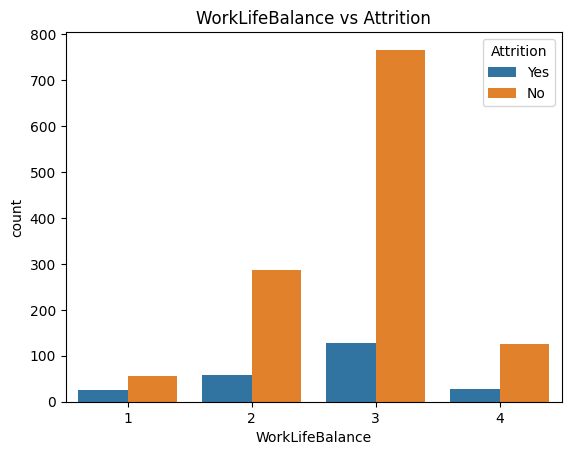

In [58]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
plt.title('WorkLifeBalance vs Attrition')
plt.show()

Lower levels of work-life balance are associated with higher attrition.
Employees with better work-life balance tend to stay longer in the organization.


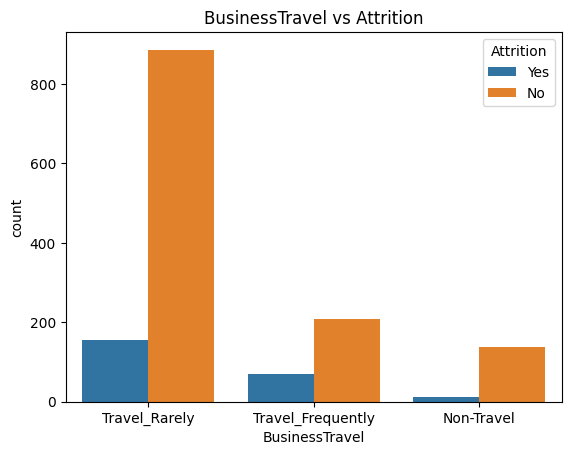

In [59]:
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('BusinessTravel vs Attrition')
plt.show()


Employees who travel frequently for work exhibit higher attrition compared to those who travel rarely or not at all.


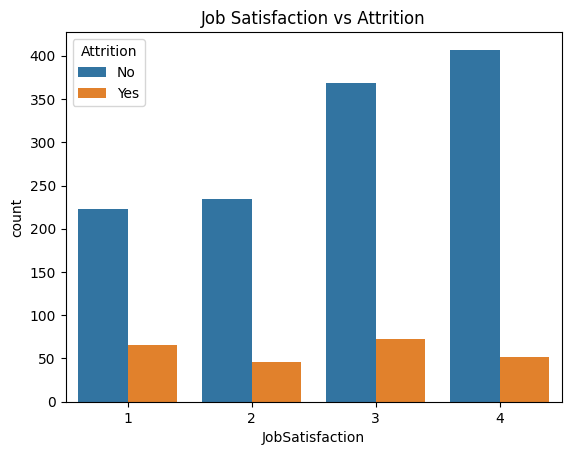

In [60]:
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Job Satisfaction vs Attrition')
plt.show()


Employees with lower job satisfaction levels show a higher proportion of attrition.
As job satisfaction increases, the likelihood of employees staying with the organization also increases.


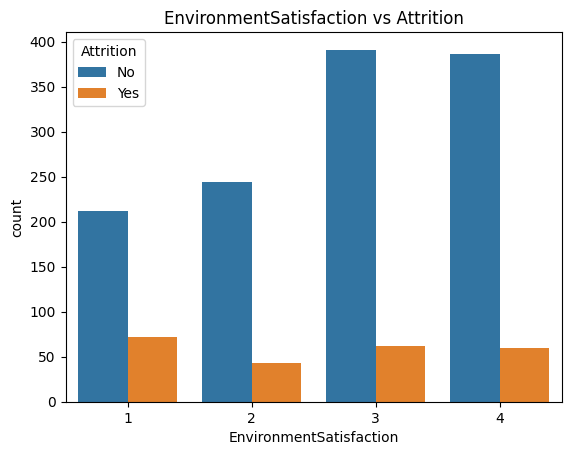

In [31]:
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.title('EnvironmentSatisfaction vs Attrition')
plt.show()

Employees reporting lower environment satisfaction tend to have higher attrition.
A positive and supportive work environment appears to be associated with better employee retention.


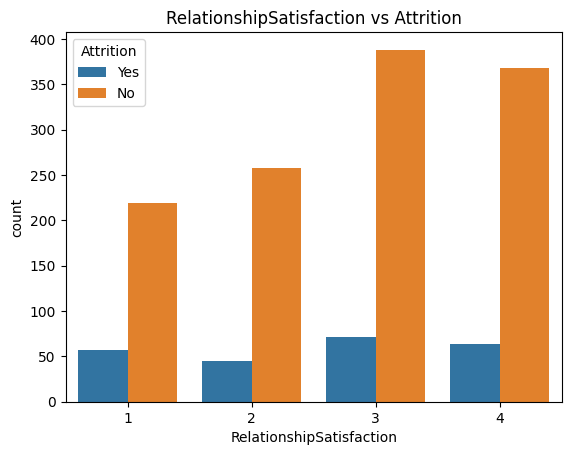

In [32]:
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df)
plt.title('RelationshipSatisfaction vs Attrition')
plt.show()

Lower relationship satisfaction with colleagues and supervisors is associated with higher attrition.
Healthy workplace relationships may play a role in retaining employees.


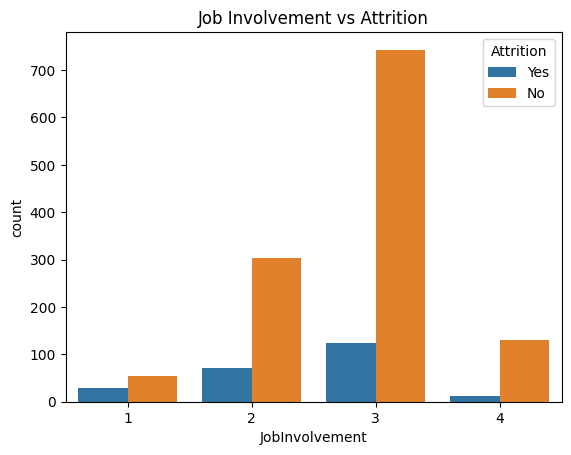

In [33]:
sns.countplot(x='JobInvolvement', hue='Attrition', data=df)
plt.title('Job Involvement vs Attrition')
plt.show()

Employees with lower levels of job involvement exhibit higher attrition.
Greater involvement in work is associated with stronger employee commitment to the organization.


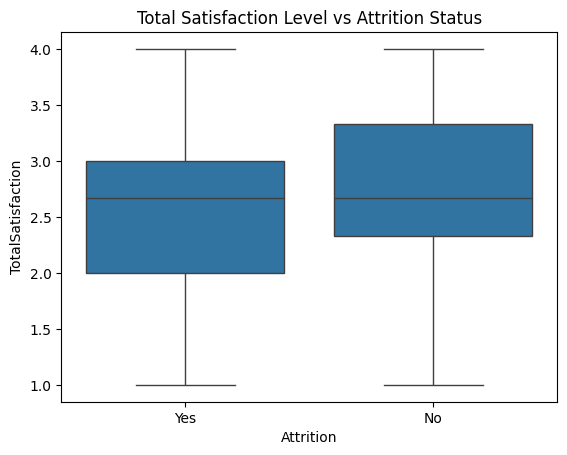

In [34]:
sns.boxplot(x='Attrition', y='TotalSatisfaction', data=df)
plt.title('Total Satisfaction Level vs Attrition Status')
plt.show()

**Numerical Features**

In [35]:
numerical_features = [
    'Age',
    'MonthlyIncome',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'TrainingTimesLastYear'
]


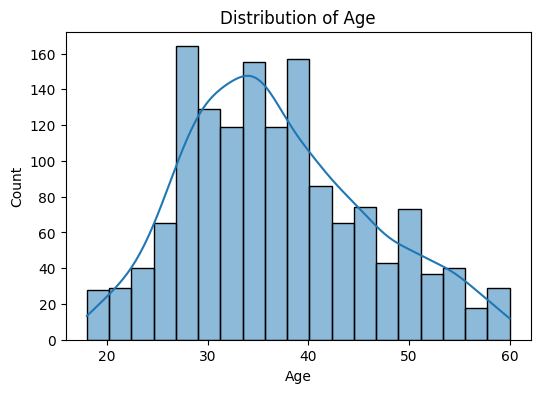

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


This section focuses on understanding the distribution and spread of key numerical variables in the dataset.
Distribution plots help identify the range, central tendency, skewness, and presence of outliers in each feature.

Analyzing these distributions provides insights into employee demographics, experience levels, income patterns,
and tenure within the organization. These insights are crucial for detecting imbalances and understanding
whether certain numerical factors may influence employee attrition in later stages of analysis.


**Multivariate Analysis**

This section explores the combined effect of multiple employee attributes on attrition.
Analyzing feature interactions provides deeper insights beyond individual relationships
and helps in understanding complex attrition patterns.

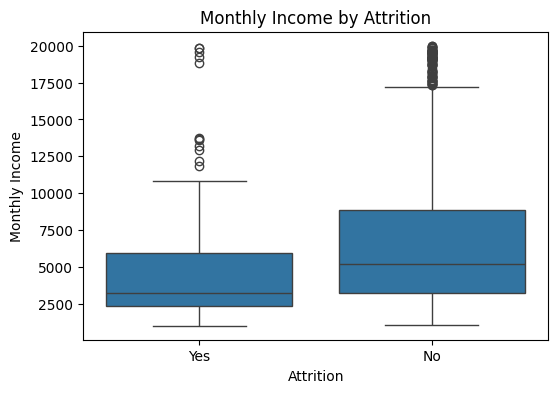

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')
plt.show()


### Multivariate Analysis: Monthly Income and Attrition

This boxplot compares the distribution of monthly income for employees who stayed
versus those who left the organization.

Employees who experienced attrition generally have lower median monthly income,
indicating that compensation may play an important role in employee retention.


 **Multivariate Analysis: Correlation Heatmap**

In this section, I am performing multivariate analysis to mathematically identify which factors drive attrition.

 Key Objectives:
* **Quantify Relationships:** Determine the strength of correlation between features like Monthly Income, Age, and Satisfaction.
* **Identify Attrition Drivers:** Using a numeric-encoded attrition variable to see which factors are most strongly linked to employees leaving.
* **Data Cleaning:** Automatically filtering out non-numeric categorical columns to ensure the statistical calculations are accurate.

In [38]:
df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

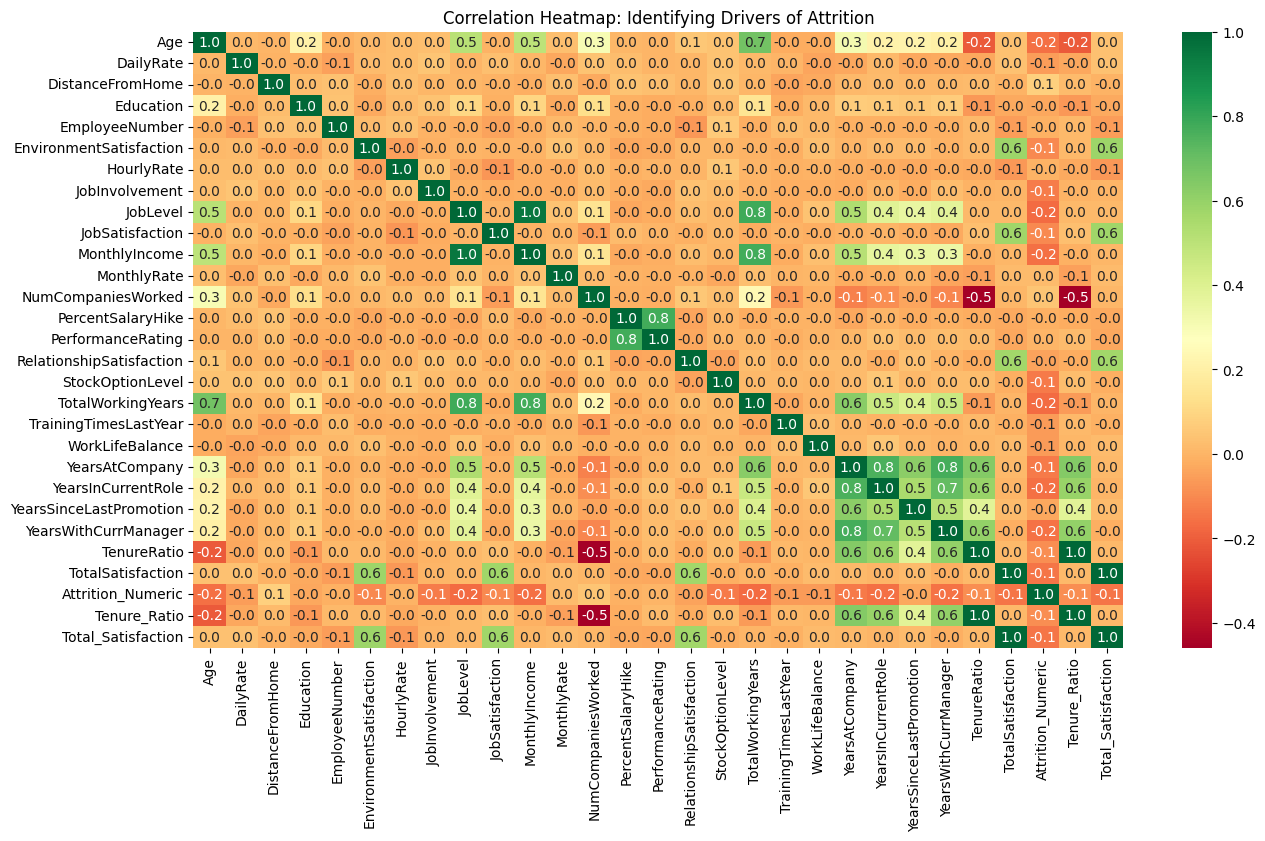

In [39]:
# Create a numeric-only dataframe for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Add Attrition_Numeric to see its relationship with other factors
df['Attrition_Numeric'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
numeric_df['Attrition_Numeric'] = df['Attrition_Numeric']

plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.1f', cmap='RdYlGn')
plt.title('Correlation Heatmap: Identifying Drivers of Attrition')
plt.show()

This multivariate analysis uses a correlation heatmap to mathematically identify the strongest numerical drivers of employee attrition while automatically filtering out non-numeric data to ensure accuracy.

### **Key Insights from Exploratory Data Analysis**

• Employee attrition is higher among younger employees and those in the early stages of their careers  
• Lower monthly income is associated with higher attrition rates  
• Employees with fewer years at the company and fewer total working years tend to leave more frequently  
• Job satisfaction, environment satisfaction, and job involvement show a strong association with employee retention  
• Employees who receive fewer promotions and limited training opportunities exhibit higher attrition


**Business Interpretation**

The analysis suggests that employee attrition is influenced by a combination of demographic,
financial, and job-related factors. Early-career employees earning lower income and experiencing
limited growth opportunities are more likely to leave the organization.

Improving compensation structures, career progression paths, and workplace satisfaction
can help organizations reduce attrition and improve long-term employee retention.


**Limitations of the Analysis**

This exploratory analysis identifies patterns and associations within the dataset
but does not establish causal relationships. The dataset does not include external
factors such as personal circumstances, management style, or market conditions,
which may also influence employee attrition.


**Conclusion**

The exploratory data analysis highlights key factors associated with employee attrition,
including age, income, experience, job satisfaction, and career growth.

These insights can support HR teams in identifying at-risk employees and
developing targeted strategies to improve employee engagement and retention.


**Strategic Recommendations**

* Targeted Retention:HR should focus retention efforts on employees with less than 2 years of tenure, as they show significantly higher attrition rates.

* Income Alignment:Conduct a salary benchmarking study for 'Junior' roles (JobLevel 1) to ensure market competitiveness and reduce turnover.